# Домашнее задание №3

<span style="color: red; font-size: 14pt">Дедлайн: 20 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com`` (или в телеграм-канал)
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 30 минут

### Задача 1 (10% баллов)

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x)$, $b_2(x)$ и $b_3(x)$, каждый из которых ошибается с вероятностью p. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1$, $w_2$ и $w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов:

$$a_0 = \sum_{i=1}^3 w_i [b_i(x)=0]$$
$$a_1 = \sum_{i=1}^3 w_i [b_i(x)=1]$$


Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Например, если первые два алгоритма голосуют за класс $0$, а третий — за класс $1$, то выбирается класс $0$, если $w_1 + w_2 > w_3$, и класс $1$ в противном случае. Какова вероятность ошибки такой композиции этих трех алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
2. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$? 

#### Решение:
1) Заметим, что если один алгоритм сказал правду, а два других ошиблись, то ответ в любом случае будет неверный $\Rightarrow$ это дает нам слагаемое $3p^2(1-p)$. Кроме того, сразу все три алгоритма могли ошибиться, что происходит с вероятностью $p^3$. Итого $2(3p^2(1-p) + p^3) = 6p^2 - 4p^3$, т.к. мы могли ошибиться в случае 0 и 1.
2) В данном случае если первый и третий алгоритмы сказали правду, а второй ошибся, то вместе они все равно выдадут неверный ответ, вероятность этого события $p(1-p)^2$. Если же первый или третий алгоритмы сказали правду, а два других ошиблись, то в сумме они все равно дадут ошибку. Вероятность этого - $2p^2(1-p)$. Ну и опять же, они все могли ошибиться - $p^3$. Итого: $2(p(1-p)^2 + 2p^2(1-p) + p^3) = 2p$.

### Задача 2 (10% баллов)

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка $[0,1]$, которые можно интерпретировать как вероятности принадлежности объектов классу $1$. В качестве функции потерь возьмем отрицательный логарифм правдоподобия:
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

### Задача 3 (10% баллов)

Известно, что на $n$-й итерации двухклассового метода AdaBoost
был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

#### Решение:
Заметим, что так как наш алгоритм ошибается только в одном элементе, то ошибка будет равна $$err_m = \frac{w_j^{(n)}}{\sum_i w_i^{(n)}}$$. Тогда $\alpha_m = \log{\frac{1 - err_m}{err_m}}$, а вес $w_j^{(n+1)}$ равен $w_j^{(n)} e^{\alpha_m}$. То есть, $$w_j^{(n+1)} = w_j^{(n)} e^{\frac{\sum_i w_i^{(n)} - w_j^{(n)}}{w_j^{(n)}}}$$.

## Часть 2. Random Forest

##### 70% баллов за задание, оценочное время выполнения 3 часа

### Реализация (40%)

**Необходимо реализовать класс `RandomForest`** (для решения задачи классификации)

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    - `num_trees` - количество деревьев в лесе;
    - `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    - `max_features` - количество признаков, принимаемое к рассмотрению при разбиении (аналогичный параметр есть в sklearn имплементации). Параметр может принимать значения:
        - int - тогда рассматриваем max_features признаков при каждом разбиении;
        - float - max_features обозначает процент, int(max_features * n_features) признаков рассматривается при каждом разбиении;
        - “sqrt” - max_features=sqrt(n_features);
        - “log2” - max_features=log2(n_features);
        - None - max_features=n_features;
    - `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', по умолчанию - 'gini'); функции с подсчетом энтропийного и критерия Джини можно взять из предыдущего дз;
    
- класс имеет методы `fit` и `predict`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `RandomForest`, представляющий собой Random Forest, обученный по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов;

In [1]:
import pandas as pd
import numpy as np
import sklearn
import random as rand
from sklearn.tree import DecisionTreeClassifier

In [104]:
def bagging(X, y, size):
    rand.seed()
    gen_X, gen_y = [], []
    
    for i in range(len(X)):
        ind = rand.randint(0, len(X) - 1)
        gen_X.append(X[ind])
        gen_y.append(y[ind])
        
    sample_X, sample_y = gen_X[:size], gen_y[:size]
    return sample_X, sample_y

In [109]:
class RandomForest(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees, max_features, max_depth=None, criterion='gini'):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.trees = []
        
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        
        for i in range(self.num_trees):
            rand_tree = DecisionTreeClassifier(max_features=self.max_features, criterion=self.criterion, 
                                           max_depth=self.max_depth)
            self.trees.append(rand_tree)
            bagged_X, bagged_y = bagging(X_train, y_train, len(X_train))
            self.trees[i].fit(bagged_X, bagged_y)
        
        return self
        
    def _find_max_class(self, pred_elem):
        diff_values, unique = np.unique(pred_elem, return_counts=True)
        return diff_values[np.argmax(unique)]
        
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        
        y_pred = np.zeros(X_test.shape[0])
        y_matr_pred = []
        
        for i in range(self.num_trees):
            y_matr_pred.append(np.array(self.trees[i].predict(X_test)))
        
        y_matr_pred = np.array(y_matr_pred)
        
        for i in range(len(X_test)):
            y_pred[i] = self._find_max_class(y_matr_pred[:, i])
        
        return y_pred

### Тестирование (15%)

Загрузите датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить Random Forest на предложенном датасете

In [106]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
random_forest = RandomForest(num_trees=200, max_depth=None, max_features=None, criterion='gini')
random_forest.fit(X_train, y_train)
print(accuracy_score(random_forest.predict(X_test), y_testtt)) 

0.972222222222


#### Вывод:
Мы видим, что точность нашего случайного леса довольно высокая, что мы и проверим далее.

Покажите, как менялись значения критерия качества `accuracy` при увеличении параметра num_trees. Видны ли следы переобучения?

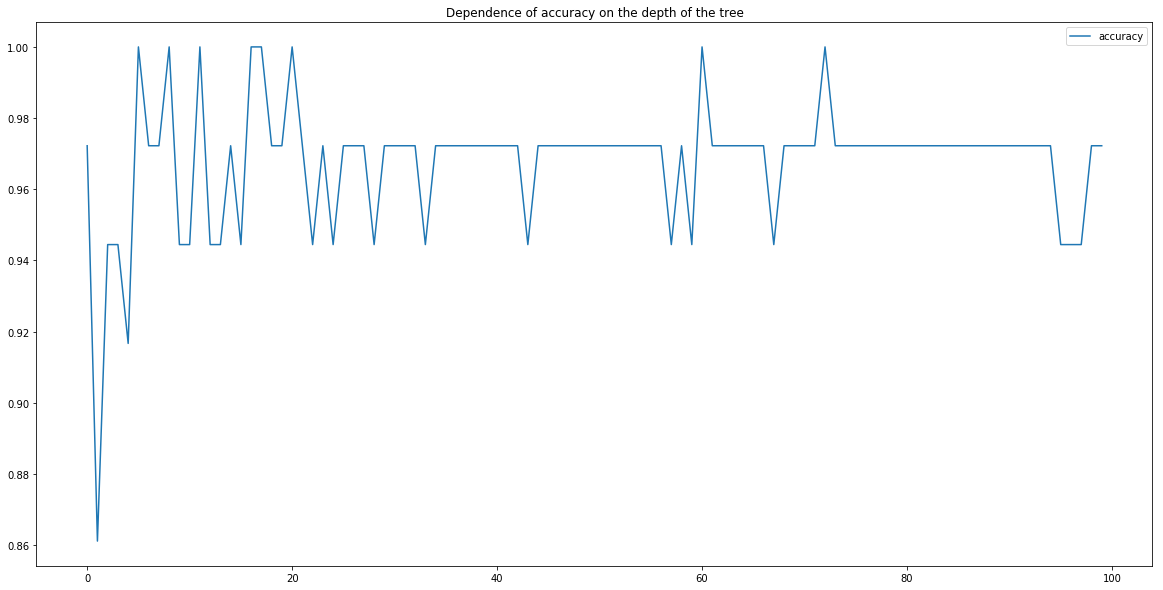

In [114]:
acc_mass = []

for i in range(1, 101):
    random_forest = RandomForest(num_trees=i, max_depth=None, max_features=None, criterion='gini')
    random_forest = random_forest.fit(X_train, y_train)
    acc_mass.append(accuracy_score(random_forest.predict(X_test), y_test))

plt.figure(figsize=(20, 10))
plt.title("Dependence of accuracy on the depth of the tree")
plt.plot(np.arange(0, 100), acc_mass, label='accuracy')
plt.legend()
plt.show()

Сравните качество работы вашей реализации RandomForest и реализации из sklearn.

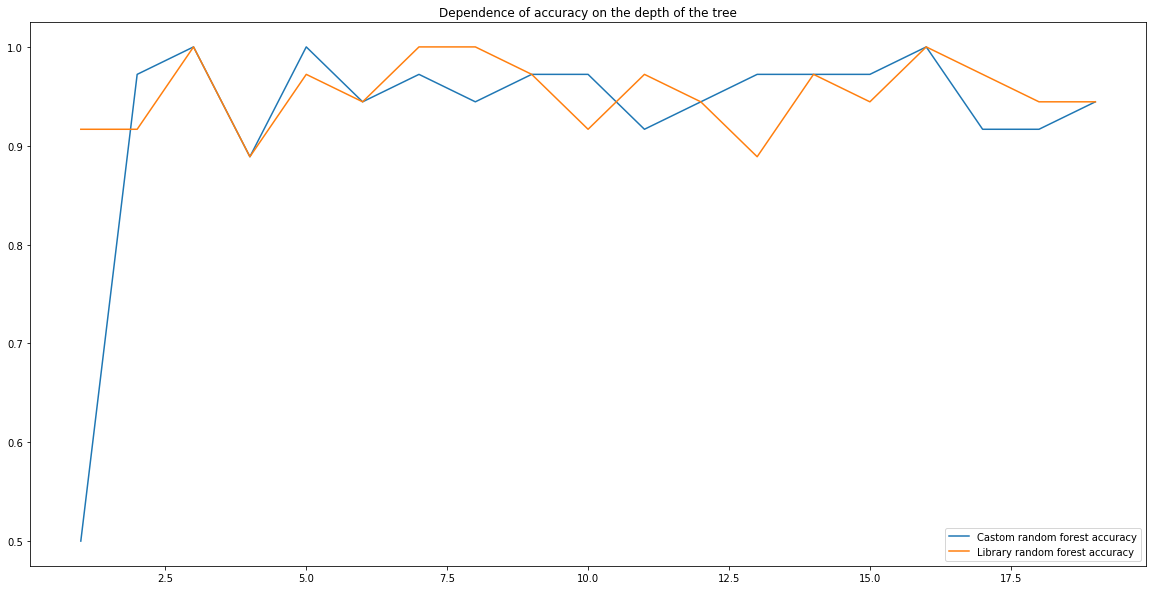

In [115]:
accuracy_on_depth_cast = []
accuracy_on_depth_lib = []

for i in range(1, 20):
    rand_forest_cast = RandomForest(num_trees=5, max_depth=i, max_features=0.3, criterion='gini')
    rand_forest_lib = RandomForestClassifier(n_estimators=5, max_depth=i, max_features=0.3, criterion='gini')
    rand_forest_cast = rand_forest_cast.fit(X_train, y_train)
    rand_forest_lib.fit(X_train, y_train)
    accuracy_on_depth_cast.append(accuracy_score(rand_forest_cast.predict(X_test), y_test))
    accuracy_on_depth_lib.append(accuracy_score(rand_forest_lib.predict(X_test), y_test))
    
plt.figure(figsize=(20, 10))
plt.title("Dependence of accuracy on the depth of the tree")
plt.plot(np.arange(1, 20), accuracy_on_depth_cast, label='Castom random forest accuracy')
plt.plot(np.arange(1, 20), accuracy_on_depth_lib, label='Library random forest accuracy')
plt.legend()
plt.show()

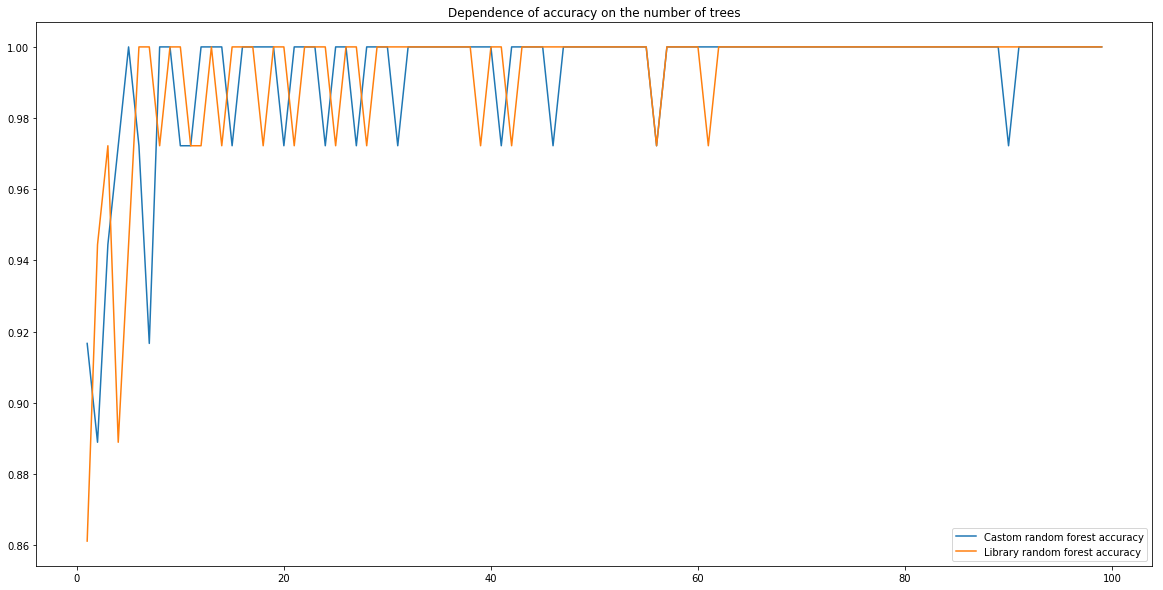

In [116]:
accuracy_on_num_trees_cast = []
accuracy_on_num_trees_lib = []

for i in range(1, 100):
    rand_forest_cast = RandomForest(num_trees=i, max_depth=None, max_features=0.3, criterion='gini')
    rand_forest_lib = RandomForestClassifier(n_estimators=i, max_depth=None, max_features=0.3, criterion='gini')
    rand_forest_cast = rand_forest_cast.fit(X_train, y_train)
    rand_forest_lib.fit(X_train, y_train)
    accuracy_on_num_trees_cast.append(accuracy_score(rand_forest_cast.predict(X_test), y_test))
    accuracy_on_num_trees_lib.append(accuracy_score(rand_forest_lib.predict(X_test), y_test))
    
plt.figure(figsize=(20, 10))
plt.title("Dependence of accuracy on the number of trees")
plt.plot(np.arange(1, 100), accuracy_on_num_trees_cast, label='Castom random forest accuracy')
plt.plot(np.arange(1, 100), accuracy_on_num_trees_lib, label='Library random forest accuracy')
plt.legend()
plt.show()

#### Вывод:
Мы видим, что точность нашей реализации в примере с изменением глубины дерева иногда превышает точность библиотечной реализации, что достаточно необычно. При этом в примере с изменением количества деревьев точность нашего леса такая же, как и в стандартной реализации. При этом переобучения нет, что совпадает с теорией.

### Модификация Random Forest (15%)

Измените свою реализацию `RandomForest` так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. Сравните результат работы с обычным RandomForest.

In [29]:
from numpy.random import choice

In [117]:
class RandomForestChangedSplit(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees, max_features, max_depth=None, criterion='gini'):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.features = []
        self.criterion = criterion
        self.trees = []
        
        
    def _gener_features(self, len_feat):
        if type(self.max_features) == int:
            self.features = choice(len_feat, min(self.max_features, len_feat), replace=False)
        elif type(self.max_features) == float:
            self.features = choice(len_feat, int(self.max_features * len_feat), replace=False)
        elif self.max_features == 'sqrt':
            self.features = choice(len_feat, int(np.sqrt(len_feat)), replace=False)
        elif self.max_features == 'log2':
            self.features = choice(len_feat, int(np.log2(len_feat)), replace=False)
        elif self.max_features == None:
            self.features = list(np.arange(len_feat))
        
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        
        self._gener_features(len(X_train[0]))
        X_train = X_train[:, self.features]
        
        for i in range(self.num_trees):
            rand_tree = DecisionTreeClassifier(max_features=self.max_features, criterion=self.criterion, 
                                           max_depth=self.max_depth)
            self.trees.append(rand_tree)
            bagged_X, bagged_y = bagging(X_train, y_train, len(X_train))
            self.trees[-1].fit(bagged_X, bagged_y)
        
        return self
    
    def _find_max_class(self, pred_elem):
        diff_values, unique = np.unique(pred_elem, return_counts=True)
        return diff_values[np.argmax(unique)]
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        
        X_test = X_test[:, self.features]
        y_pred = np.zeros(X_test.shape[0])
        y_matr_pred = []
        
        for i in range(self.num_trees):
            y_matr_pred.append(np.array(self.trees[i].predict(X_test)))
        
        y_matr_pred = np.array(y_matr_pred)
        
        for i in range(len(X_test)):
            y_pred[i] = self._find_max_class(y_matr_pred[:, i])
        
        return y_pred

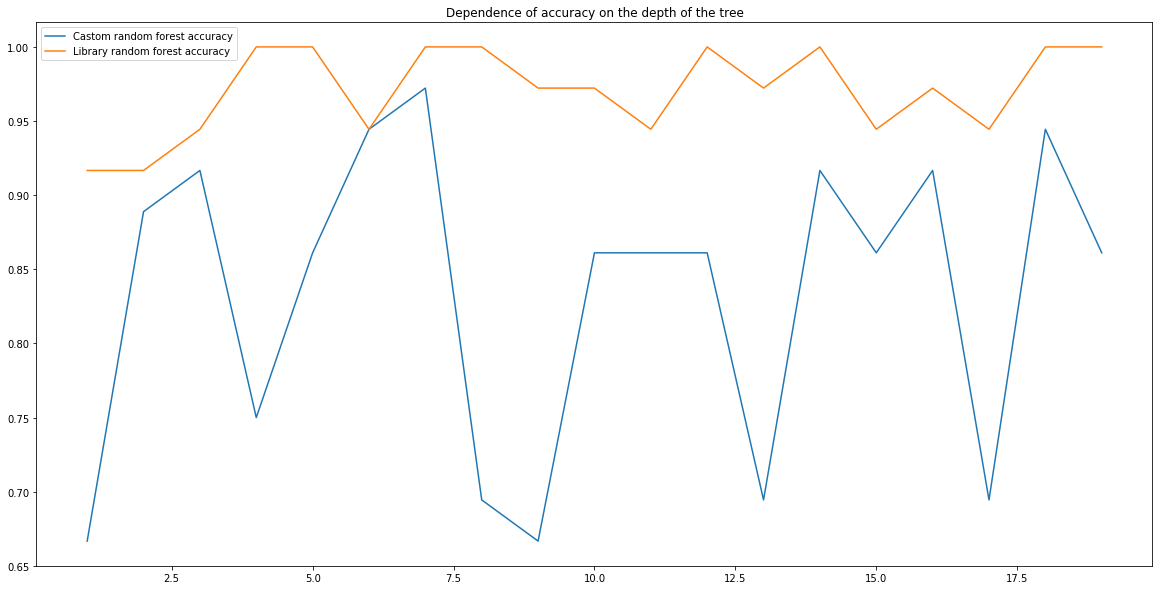

In [119]:
accuracy_on_depth_cast = []
accuracy_on_depth_lib = []

for i in range(1, 20):
    rand_forest_cast = RandomForestChangedSplit(num_trees=15, max_depth=i, max_features=0.3, criterion='gini')
    rand_forest_lib = RandomForestClassifier(n_estimators=15, max_depth=i, max_features=0.3, criterion='gini')
    rand_forest_cast = rand_forest_cast.fit(X_train, y_train)
    rand_forest_lib.fit(X_train, y_train)
    accuracy_on_depth_cast.append(accuracy_score(rand_forest_cast.predict(X_test), y_test))
    accuracy_on_depth_lib.append(accuracy_score(rand_forest_lib.predict(X_test), y_test))
    
plt.figure(figsize=(20, 10))
plt.title("Dependence of accuracy on the depth of the tree")
plt.plot(np.arange(1, 20), accuracy_on_depth_cast, label='Castom random forest accuracy')
plt.plot(np.arange(1, 20), accuracy_on_depth_lib, label='Library random forest accuracy')
plt.legend()
plt.show()

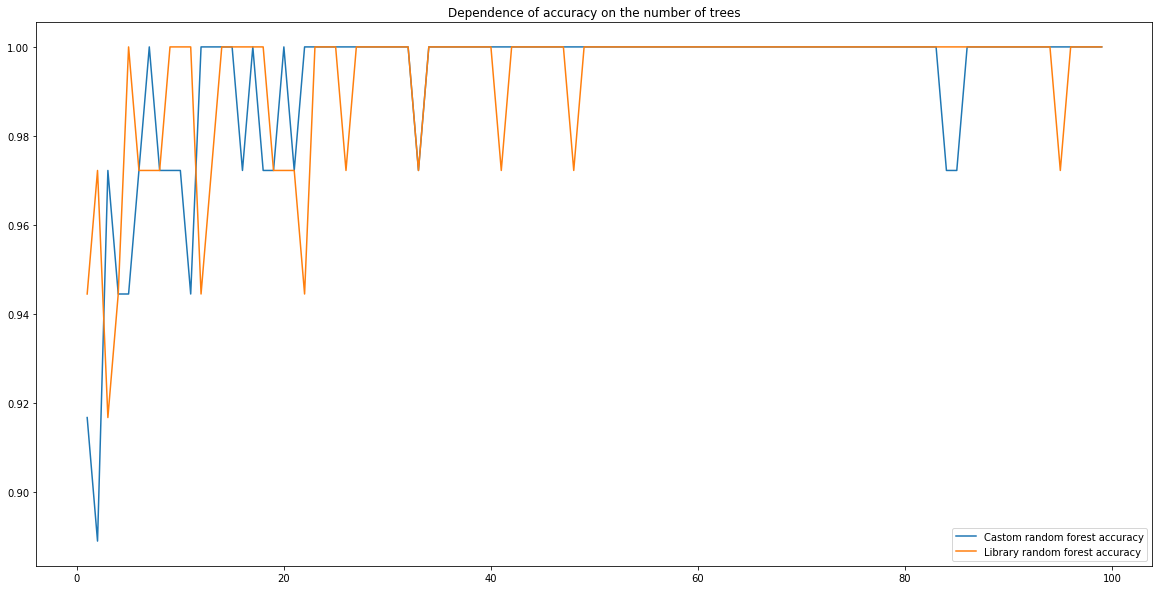

In [120]:
accuracy_on_num_trees_cast = []
accuracy_on_num_trees_lib = []

for i in range(1, 100):
    rand_forest_cast = RandomForest(num_trees=i, max_depth=None, max_features=0.3, criterion='gini')
    rand_forest_lib = RandomForestClassifier(n_estimators=i, max_depth=None, max_features=0.3, criterion='gini')
    rand_forest_cast = rand_forest_cast.fit(X_train, y_train)
    rand_forest_lib.fit(X_train, y_train)
    accuracy_on_num_trees_cast.append(accuracy_score(rand_forest_cast.predict(X_test), y_test))
    accuracy_on_num_trees_lib.append(accuracy_score(rand_forest_lib.predict(X_test), y_test))
    
plt.figure(figsize=(20, 10))
plt.title("Dependence of accuracy on the number of trees")
plt.plot(np.arange(1, 100), accuracy_on_num_trees_cast, label='Castom random forest accuracy')
plt.plot(np.arange(1, 100), accuracy_on_num_trees_lib, label='Library random forest accuracy')
plt.legend()
plt.show()

#### Вывод:
Мы видим, что при изменении глубины каждого дерева и количества деревьев точность нашей реализации random forest колеблется от 0.6 до 0.9. При это четко видно, что библиотечная реализация обходит нашу везде, что говорит о том, что в библиотечной версии могут быть параметры, которые мы не учитываем, но которые влияют на точность.